<a href="https://colab.research.google.com/github/sami10644/My-First-Psychology-Research-/blob/main/Psychology_ml_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [6]:
print("Reading responses.csv into a dataframe")
import pandas as pd
df = pd.read_csv("responses.csv")

Reading responses.csv into a dataframe


In [7]:

df.shape

(1010, 150)

In [8]:
print("Printing df.head()")
df.head()

Printing df.head()


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,...,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,...,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,...,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,...,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,...,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day,2.0,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,2.0,3.0,3.0,3.0,3.0,5.0,4.0,2.0,3.0,5.0,5.0,2.0,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day,4.0,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


EDA

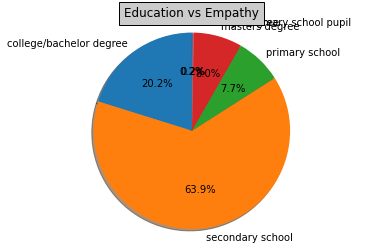

In [9]:
import matplotlib.pyplot as plt
c_empathetic = 0
s_empathetic = 0
p_empathetic = 0
m_empathetic = 0
d_empathetic = 0
cu_empathetic = 0
for i,value in enumerate(df['Education'].values):
    if(value == 'college/bachelor degree' and df['Empathy'].values[i]>=4):
        c_empathetic += 1
    elif(value == 'secondary school' and df['Empathy'].values[i]>=4):
        s_empathetic += 1
    elif(value == 'primary school' and df['Empathy'].values[i]>=4):
        p_empathetic += 1
    elif(value == 'masters degree' and df['Empathy'].values[i]>=4):
        m_empathetic += 1
    elif(value == 'doctorate degree' and df['Empathy'].values[i]>=4):
        d_empathetic += 1
    elif(value == 'currently a primary school pupil' and df['Empathy'].values[i]>=4):
        cu_empathetic += 1

labels = ['college/bachelor degree','secondary school','primary school','masters degree','doctorate degree','currently a primary school pupil']
sizes = [c_empathetic, s_empathetic,p_empathetic,m_empathetic,d_empathetic,cu_empathetic]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Education vs Empathy', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

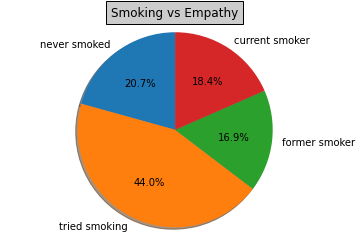

In [10]:
import matplotlib.pyplot as plt
n_empathetic = 0
tr_empathetic = 0
fm_empathetic = 0
cr_empathetic = 0

for i,value in enumerate(df['Smoking'].values):
    if(value == 'never smoked' and df['Empathy'].values[i]>=4):
        n_empathetic += 1
    elif(value == 'tried smoking' and df['Empathy'].values[i]>=4):
        tr_empathetic += 1
    elif(value == 'former smoker' and df['Empathy'].values[i]>=4):
        fm_empathetic += 1
    elif(value == 'current smoker' and df['Empathy'].values[i]>=4):
        cr_empathetic += 1
    

labels = ['never smoked','tried smoking','former smoker','current smoker']
sizes = [n_empathetic, tr_empathetic,fm_empathetic,cr_empathetic]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Smoking vs Empathy', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [11]:
print("Finding the unique values for the catogorical attributes")

df['Alcohol'].unique()




Finding the unique values for the catogorical attributes


array(['drink a lot', 'social drinker', 'never', nan], dtype=object)

In [12]:
df['Internet usage'].unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [13]:
df['Punctuality'].unique()

array(['i am always on time', 'i am often early',
       'i am often running late', nan], dtype=object)

In [14]:
df['Smoking'].unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker',
       nan], dtype=object)

In [15]:
df['Lying'].unique()

array(['never', 'sometimes', 'only to avoid hurting someone',
       'everytime it suits me', nan], dtype=object)

In [16]:
df['Only child'].unique()

array(['no', 'yes', nan], dtype=object)

In [17]:
df['Village - town'].unique()

array(['village', 'city', nan], dtype=object)

In [18]:
df['House - block of flats'].unique()

array(['block of flats', 'house/bungalow', nan], dtype=object)

In [19]:
print("Converting catogorical values to integers between (1-5)")
for i in df["Smoking"]:
    if i == "never smoked":
        df.replace(i, 1.0, inplace=True)
    elif i == "tried smoking":
        df.replace(i, 2.0, inplace=True)
    elif i == "former smoker":
        df.replace(i, 3.0, inplace=True)
    elif i == "current smoker":
        df.replace(i, 4.0, inplace=True)

Converting catogorical values to integers between (1-5)


In [20]:
for i in df["Alcohol"]:
    if i == "never":
        df.replace(i, 1.0, inplace=True)
    elif i == "social drinker":
        df.replace(i, 2.0, inplace=True)
    elif i == "drink a lot":
        df.replace(i, 3.0, inplace=True)

In [21]:
for i in df["Punctuality"]:
    if i == "i am always on time":
        df.replace(i, 1.0, inplace=True)
    elif i == "i am often early":
        df.replace(i, 2.0, inplace=True)
    elif i == "i am often running late":
        df.replace(i, 3.0, inplace=True)

In [22]:
for i in df["Lying"]:
    if i == "never":
        df.replace(i, 1.0, inplace=True)
    elif i == "sometimes":
        df.replace(i, 2.0, inplace=True)
    elif i == "only to avoid hurting someone":
        df.replace(i, 3.0, inplace=True)
    elif i == "everytime it suits me":
        df.replace(i, 4.0, inplace=True)

In [23]:
for i in df["Internet usage"]:
    if i == "few hours a day":
        df.replace(i, 1.0, inplace=True)
    elif i == "most of the day":
        df.replace(i, 2.0, inplace=True)
    elif i == "less than an hour a day":
        df.replace(i, 3.0, inplace=True)
    elif i == "no time at all":
        df.replace(i, 4.0, inplace=True)

In [24]:
for i in df["Gender"]:
    if i == "female":
        df.replace(i, 1.0, inplace=True)
    elif i == "male":
        df.replace(i, 2.0, inplace=True)

In [25]:
for i in df["Left - right handed"]:
    if i == "right handed":
        df.replace(i, 1.0, inplace=True)
    elif i == "left handed":
        df.replace(i, 2.0, inplace=True)

In [26]:
for i in df["Education"]:
    if i == "college/bachelor degree":
        df.replace(i, 1.0, inplace=True)
    elif i == "secondary school":
        df.replace(i, 2.0, inplace=True)
    elif i == "primary school":
        df.replace(i, 3.0, inplace=True)
    elif i == "masters degree":
        df.replace(i, 4.0, inplace=True)
    elif i == "doctorate degree":
        df.replace(i, 5.0, inplace=True)
    elif i == "currently a primary school pupil":
        df.replace(i, 6.0, inplace=True)

In [27]:
for i in df["Only child"]:
    if i == "no":
        df.replace(i, 1.0, inplace=True)
    elif i == "yes":
        df.replace(i, 2.0, inplace=True)
        

In [28]:
for i in df["House - block of flats"]:
    if i == "block of flats":
        df.replace(i, 1.0, inplace=True)
    elif i == "house/bungalow":
        df.replace(i, 2.0, inplace=True)

In [29]:
for i in df["Village - town"]:
    if i =="village":
        df.replace(i,1.0,inplace=True)
    elif i =="city":
        df.replace(i,2.0,inplace = True)

In [30]:

df.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [31]:
print("Imputing the NaN values with the mode")

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NAN, strategy='mean', fill_value=None, verbose=0, copy=True)
imp.fit(df)
df_data = imp.transform(df)
df = pd.DataFrame(data=df_data[:,:],
                     index=[i for i in range(len(df_data))],
                     columns=df.columns.tolist())

Imputing the NaN values with the mode


In [32]:
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

print("Selecting the best features")
y_all = [i for i in df.iloc[:, 95]]
responses_train = df.drop(["Empathy"], axis=1)
x_all = responses_train.iloc[:, :].values

test = SelectKBest(score_func=chi2, k=100)
bestfit = test.fit(x_all, y_all)
features = bestfit.transform(x_all)
x_all=features

Selecting the best features


In [33]:
cols = test.get_support(indices=True)
#print(cols)
colnames=df.columns[cols]
print(colnames)


Index(['Slow songs or fast songs', 'Folk', 'Country', 'Musical', 'Rock',
       'Metal or Hardrock', 'Punk', 'Reggae, Ska', 'Rock n roll',
       'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Horror',
       'Thriller', 'Romantic', 'Sci-fi', 'Fantasy/Fairy tales', 'Documentary',
       'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics',
       'Physics', 'PC', 'Economy Management', 'Biology', 'Reading',
       'Geography', 'Foreign languages', 'Law', 'Cars', 'Art exhibitions',
       'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing',
       'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping',
       'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying',
       'Storm', 'Darkness', 'Spiders', 'Snakes', 'Rats', 'Ageing',
       'Fear of public speaking', 'Smoking', 'Prioritising workload',
       'Writing notes', 'Workaholism', 'Final judgement', 'Keeping promises',
       'Loss of interest', 'Fake', 'Crimi

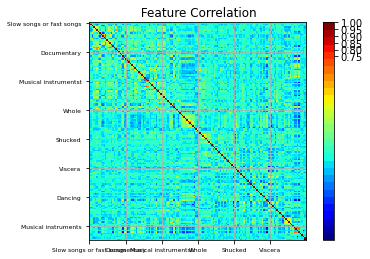

In [34]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title(' Feature Correlation')
    labels=['Music','Slow songs or fast songs','Documentary','Musical instrumentst','Whole','Shucked','Viscera','Dancing','Musical instruments',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

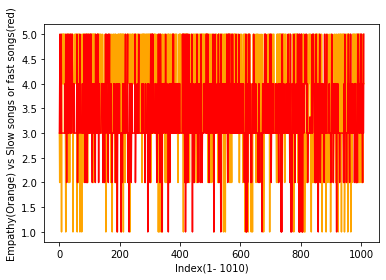

In [35]:
from matplotlib.pyplot import subplots, show
list1 = np.squeeze(df['Slow songs or fast songs'].values).tolist()
list2 = np.squeeze(df['Empathy'].values).tolist()
x = range(1010)

fig, ax = subplots()
ax.plot(x, list2,color='orange')
ax.plot(x,list1,color='red')
ax.set_xlabel("Index(1- 1010)")
ax.set_ylabel("Empathy(Orange) vs Slow songs or fast songs(red)")
show()

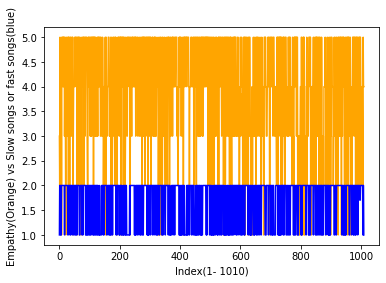

In [36]:
from matplotlib.pyplot import subplots, show
list1 = np.squeeze(df['Village - town'].values).tolist()
list2 = np.squeeze(df['Empathy'].values).tolist()
x = range(1010)

fig, ax = subplots()
ax.plot(x, list2,color='orange')
ax.plot(x,list1,color='blue')
ax.set_xlabel("Index(1- 1010)")
ax.set_ylabel("Empathy(Orange) vs Slow songs or fast songs(blue)")
show()

In [37]:
print("Partitioning the dataset into train, dev and test")
y = y_all[:int(len(y_all)*0.8)]
y_test = y_all[int(len(y_all)*0.8):]
x = x_all[:int(len(x_all)*0.8)]
x_test = x_all[int(len(x_all)*0.8):]

x_train, x_dev, y_train, y_dev = model_selection.train_test_split(x, y, test_size=20, random_state=50)


Partitioning the dataset into train, dev and test


In [38]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
dummy=DummyClassifier(strategy='most_frequent')
models=[]
results=[]
names=[]
models.append(('Dummy Classifier',DummyClassifier(strategy='most_frequent')))
models.append(('SVC',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Logistic Regression',LogisticRegression()))
models.append(('Random Forest',RandomForestClassifier(random_state=None)))
print("Evaluating classifiers on the training data using 10 fold cross validation")
for name,model in models:
    
            #print("Evaluating classifiers on the training data using 10 fold cross validation")
            kfold = model_selection.KFold(n_splits=10, random_state=None)
            pred = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
            results.append(pred)
            names.append(name)
            print("Accuracy for", name,"is")
            print( pred.mean()*100, "%")


Evaluating classifiers on the training data using 10 fold cross validation
Accuracy for Dummy Classifier is
36.28854268094774 %
Accuracy for SVC is
36.28854268094774 %
Accuracy for KNN is
35.772476468678995 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy for Logistic Regression is
59.52125933138592 %
Accuracy for Random Forest is
84.12690684842585 %


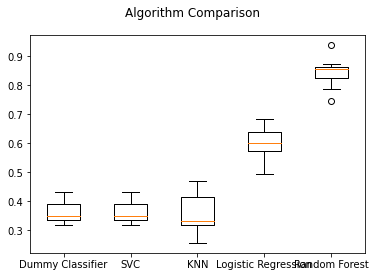

In [39]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [40]:
print("fsfsfs_")

fsfsfs_


In [52]:

rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
model=CV_rfc.fit(x_train, y_train)


pred_dev = model.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, pred_dev)*100, "%")

Accuracy on the development data:  85.0 %


In [53]:
params = model.best_estimator_.get_params()
print("best parameters found through GridSearch for Random Forest: ",params)

best parameters found through GridSearch for Random Forest:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [54]:
model = RandomForestClassifier(bootstrap=params['bootstrap'], criterion=params['criterion'], max_depth=params['max_depth'], n_estimators=params['n_estimators'])
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

print("Checking accuracy of Logistic Regression on Development Set")
print("Tuning hyperparameters on the validation data")

logistic = LogisticRegression()
C = np.logspace(0, 4, 5)
multiclass=['ovr','multinomial']
solver=['newton-cg','lbfgs','saga']
hyperparameters = dict(C=C, multi_class=multiclass, solver=solver)
GS = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)
modellr = GS.fit(x_train, y_train)
#pred_devlr = modellr.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, pred_devlr)*100, "%")

Checking accuracy of Logistic Regression on Development Set
Tuning hyperparameters on the validation data
Accuracy on the development data:  95.0 %


In [56]:
paramslr = modellr.best_estimator_.get_params()
print("best parameters found through GridSearch for Logistic Regression: ",paramslr)

best parameters found through GridSearch for Logistic Regression:  {'C': 1000.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [44]:

pred_devlr=modellr.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, pred_devlr)*100, "%")

Accuracy on the development data:  95.0 %


In [45]:

knn=KNeighborsClassifier()
k_range = list(range(1, 31))
print(k_range)

param_grid = dict(n_neighbors=k_range)
print(param_grid)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train,y_train)
predknn=grid.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, predknn)*100, "%")

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Accuracy on the development data:  30.0 %


In [46]:
paramsknn = grid.best_estimator_.get_params()
print("best parameters found through GridSearch for KNN: ",paramsknn)

best parameters found through GridSearch for KNN:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}


In [47]:
print("Making predictions on the test data")
grid =KNeighborsClassifier(algorithm=paramsknn['algorithm'], metric=paramsknn['metric'], weights=paramsknn['weights'])
grid.fit(x_train, y_train)
predknn=grid.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, predknn)*100, "%")

Making predictions on the test data
Accuracy on the development data:  30.0 %


In [57]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)

#grid_search.best_params_

In [58]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
paramsvm = grid_search.best_estimator_.get_params()
print("best parameters found through GridSearch for SVM: ",paramsvm)

best parameters found through GridSearch for SVM:  {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [60]:
grid_search = SVC(C=paramsvm['C'], cache_size=paramsvm['cache_size'], kernel=paramsvm['kernel'], gamma=paramsvm['gamma'])
grid_search.fit(x_train, y_train)
predsvm=grid_search.predict(x_dev)
print("Accuracy on the development data: ",accuracy_score(y_dev, predsvm)*100, "%")

Accuracy on the development data:  90.0 %


In [61]:
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)

Accuracy on the test data for Dummy Classifier:  34.65346534653465 %
Accuracy on the test data for Random Forest:  81.68316831683168 %
Accuracy on the test data for Logistic Regression:  88.61386138613861 %
Accuracy on the test data for KNN:  35.148514851485146 %
Accuracy on the test data for SVM:  75.24752475247524 %


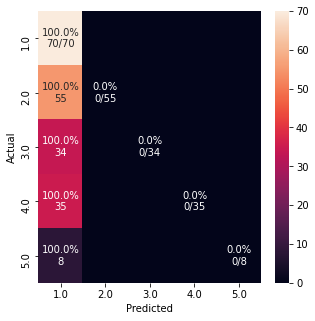

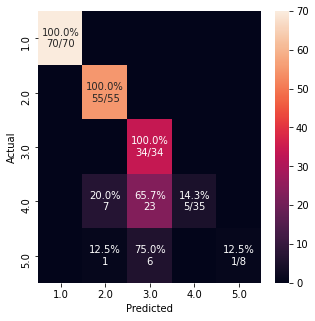

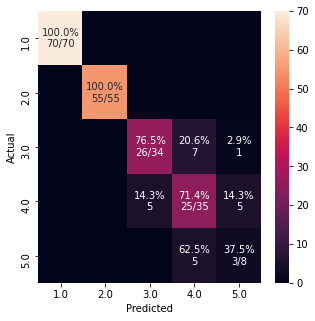

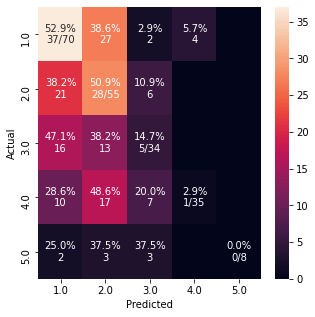

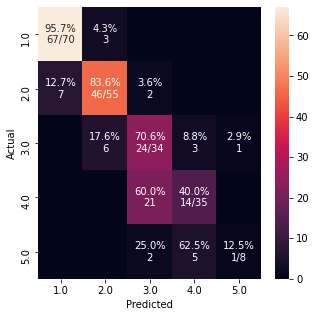

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
modeldummy=dummy.fit(x_train,y_train)
pred_dummy = modeldummy.predict(x_test)
pred_list=list(pred_dummy)
print("Accuracy on the test data for Dummy Classifier: ",accuracy_score(y_test, pred_dummy)*100, "%")
#cm = confusion_matrix(y_test, pred_dummy)
#print(cm)
#fig = plt.figure()
cm_analysis(y_test,pred_dummy,dummy.classes_,None,figsize=(5,5))
pred_test = model.predict(x_test)
print("Accuracy on the test data for Random Forest: ",accuracy_score(y_test, pred_test)*100, "%")
cm_analysis(y_test,pred_test,model.classes_,None,figsize=(5,5))
pred_testlr = modellr.predict(x_test)
print("Accuracy on the test data for Logistic Regression: ",accuracy_score(y_test, pred_testlr)*100, "%")
cm_analysis(y_test,pred_testlr,modellr.classes_,None,figsize=(5,5))
pred_testknn = grid.predict(x_test)
print("Accuracy on the test data for KNN: ",accuracy_score(y_test, pred_testknn)*100, "%")
cm_analysis(y_test,pred_testknn,grid.classes_,None,figsize=(5,5))
pred_testsvm = grid_search.predict(x_test)
print("Accuracy on the test data for SVM: ",accuracy_score(y_test, pred_testsvm)*100, "%")
cm_analysis(y_test,pred_testsvm,grid_search.classes_,None,figsize=(5,5))